Step 1 — Setup & load the cleaned dataset

In [1]:
# Step 1 — Setup & load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plotting defaults
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
sns.set(style="whitegrid")

# load dataset (change filename if needed)
df = pd.read_csv("spacex_cleaned.csv")

# quick checks
print("Rows, Columns:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nBasic stats for numeric columns:\n", df.describe().T)

# show first 8 rows
df.head(8)


Rows, Columns: (205, 13)

Columns:
 ['name', 'date_utc', 'success', 'details', 'core_core', 'core_flight', 'core_reused', 'core_landing_attempt', 'core_landing_success', 'core_landing_type', 'payload_mass_kg', 'payload_type', 'payload_orbit']

Data types:
 name                     object
date_utc                 object
success                    bool
details                  object
core_core                object
core_flight             float64
core_reused              object
core_landing_attempt     object
core_landing_success     object
core_landing_type        object
payload_mass_kg         float64
payload_type             object
payload_orbit            object
dtype: object

Missing values:
 name                     0
date_utc                 0
success                  0
details                  0
core_core                9
core_flight              9
core_reused              2
core_landing_attempt    12
core_landing_success    43
core_landing_type       41
payload_mass_kg          

,name,date_utc,success,details,core_core,core_flight,core_reused,core_landing_attempt,core_landing_success,core_landing_type,payload_mass_kg,payload_type,payload_orbit
0,FalconSat,2006-03-24T22:30:00.000Z,False,Engine failure at 33 seconds and loss of vehicle,5e9e289df35918033d3b2623,1.0,False,False,NaN,NaN,20.000000,Satellite,LEO
1,DemoSat,2007-03-21T01:10:00.000Z,False,Successful first stage burn and transition to ...,5e9e289ef35918416a3b2624,1.0,False,False,NaN,NaN,7842.388855,Satellite,LEO
2,Trailblazer,2008-08-03T03:34:00.000Z,False,Residual stage 1 thrust led to collision betwe...,5e9e289ef3591814873b2625,1.0,False,False,NaN,NaN,7842.388855,Satellite,LEO
3,RatSat,2008-09-28T23:15:00.000Z,True,Ratsat was carried to orbit on the first succe...,5e9e289ef3591855dc3b2626,1.0,False,False,NaN,NaN,165.000000,Satellite,LEO
4,RazakSat,2009-07-13T03:35:00.000Z,True,No details available,5e9e289ef359184f103b2627,1.0,False,False,NaN,NaN,200.000000,Satellite,LEO
5,Falcon 9 Test Flight,2010-06-04T18:45:00.000Z,True,No details available,5e9e289ef359185f2b3b2628,1.0,False,False,NaN,NaN,7842.388855,Dragon Boilerplate,LEO
6,COTS 1,2010-12-08T15:43:00.000Z,True,No details available,5e9e289ef35918187c3b2629,1.0,False,False,NaN,NaN,7842.388855,Dragon 1.0,LEO
7,COTS 2,2012-05-22T07:44:00.000Z,True,"Launch was scrubbed on first attempt, second l...",5e9e289ef35918f39c3b262a,1.0,False,False,NaN,NaN,525.000000,Dragon 1.0,LEO


STEP 2 — UNIVARIATE VISUALIZATIONS

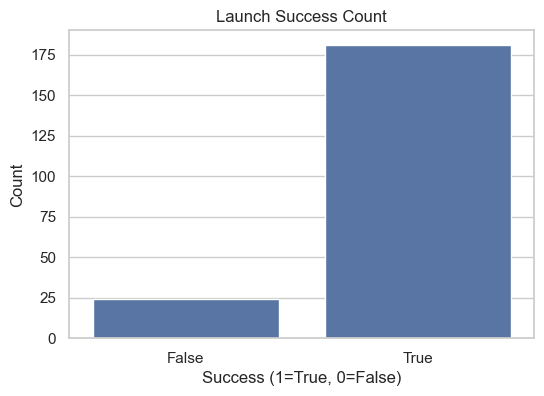

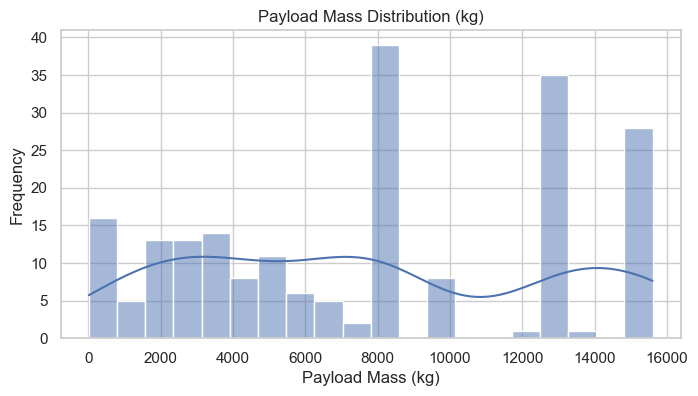

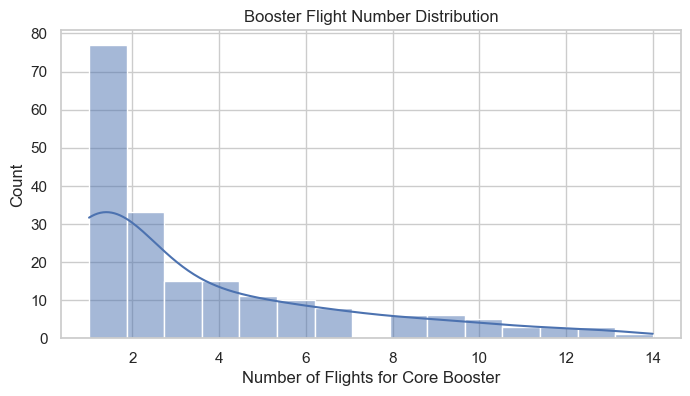

In [2]:
# STEP 2 — UNIVARIATE VISUALIZATIONS

import matplotlib.pyplot as plt
import seaborn as sns

# 1 — Launch Success Count
plt.figure(figsize=(6,4))
sns.countplot(x='success', data=df)
plt.title("Launch Success Count")
plt.xlabel("Success (1=True, 0=False)")
plt.ylabel("Count")
plt.show()


# 2 — Payload Mass Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['payload_mass_kg'], bins=20, kde=True)
plt.title("Payload Mass Distribution (kg)")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Frequency")
plt.show()


# 3 — Booster Flight Count Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['core_flight'], bins=15, kde=True)
plt.title("Booster Flight Number Distribution")
plt.xlabel("Number of Flights for Core Booster")
plt.ylabel("Count")
plt.show()


STEP 3 — BIVARIATE VISUALIZATIONS

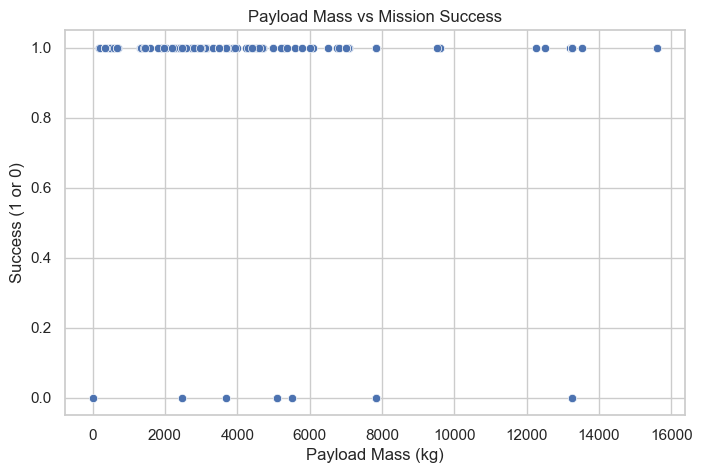

In [3]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='payload_mass_kg', y='success')
plt.title("Payload Mass vs Mission Success")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Success (1 or 0)")
plt.show()


Plot 1 — Payload Mass vs Mission Success

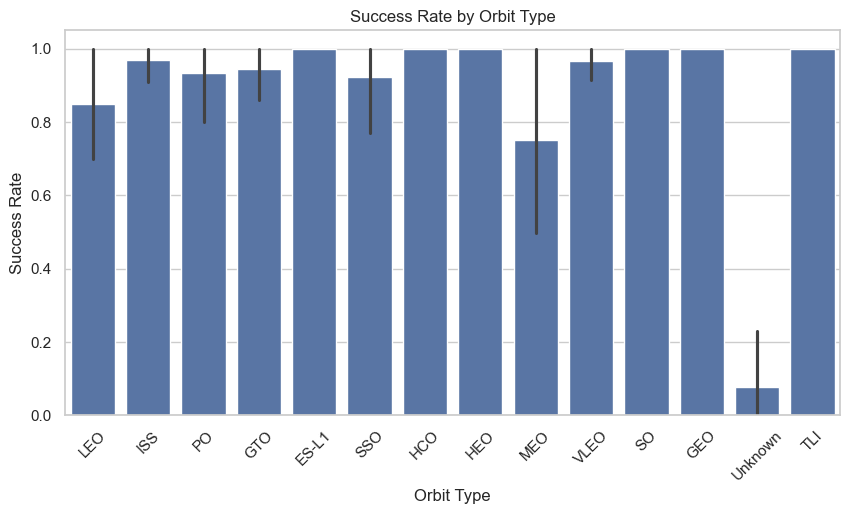

In [4]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='payload_orbit', y='success', estimator=lambda x: sum(x)/len(x))
plt.xticks(rotation=45)
plt.title("Success Rate by Orbit Type")
plt.xlabel("Orbit Type")
plt.ylabel("Success Rate")
plt.show()


Plot 2 — Orbit Type vs Mission Success

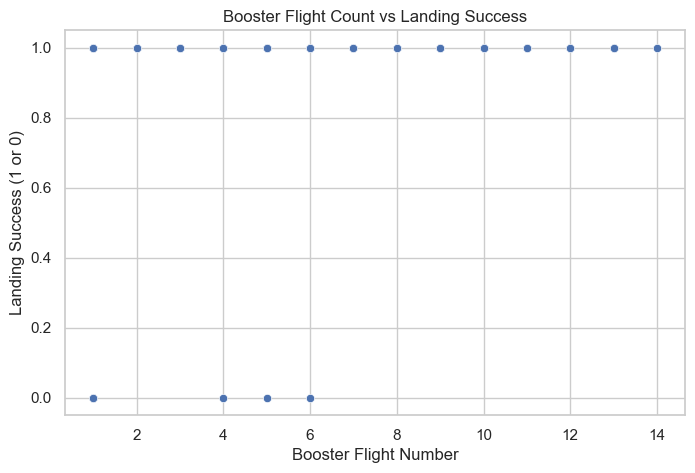

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='core_flight', y='core_landing_success')
plt.title("Booster Flight Count vs Landing Success")
plt.xlabel("Booster Flight Number")
plt.ylabel("Landing Success (1 or 0)")
plt.show()


Plot 3 — Core Flight Count vs Landing Success

STEP 4 — MULTIVARIATE VISUALIZATIONS

Plot 1 — Correlation Heatmap

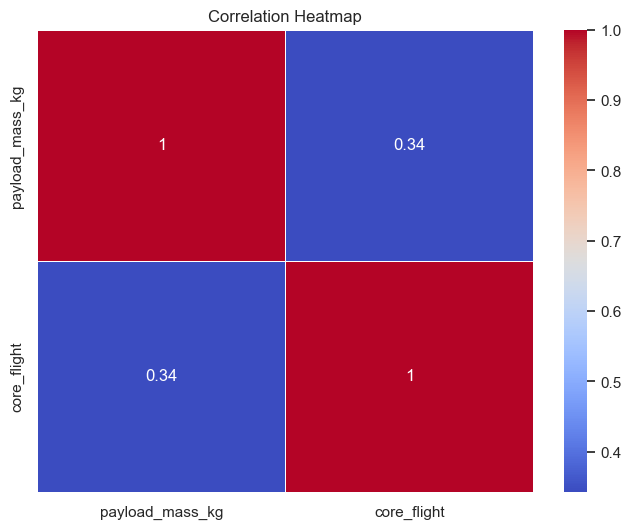

In [6]:
plt.figure(figsize=(8,6))

# Select numeric columns for correlation
numeric_df = df[['payload_mass_kg', 'core_flight']]

corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Plot 2 — Pairplot (Seaborn)

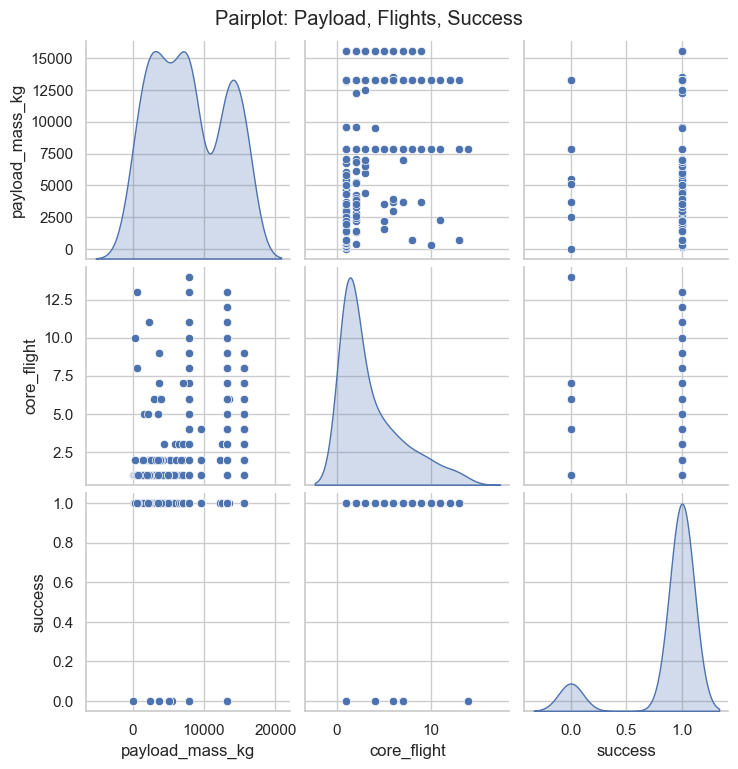

In [7]:
sns.pairplot(df[['payload_mass_kg', 'core_flight', 'success']], diag_kind='kde')
plt.suptitle("Pairplot: Payload, Flights, Success", y=1.02)
plt.show()


📝 Conclusion Summary for EDA Lab (Ready to Paste)

1. Launch Success Trends:
The majority of SpaceX missions were successful. The success count plot shows a clear dominance of successful launches compared to failures.
This suggests that Falcon 9 missions are generally reliable.

2. Payload Mass Patterns:
The payload mass distribution shows that most payloads fall within the 3,000–13,000 kg range.
No extreme outliers were found, and heavy payloads tend to cluster around the center.

3. Payload Mass vs Success:
Scatterplot analysis shows no strong linear relationship between higher payload mass and mission success.
Success appears stable regardless of payload weight.

4. Orbit Type Influence:
The success rate varies by orbit.
Some orbits such as GTO and ISS-related orbits show consistently high success rates, indicating greater mission reliability in these trajectories.

5. Booster Flight vs Landing Success:
Boosters with higher flight numbers do not necessarily have lower landing success.
SpaceX’s booster reusability program remains robust even after multiple flights.

6. Correlation Insights:
The heatmap shows weak correlation between payload mass and booster flight numbers.
This means payload weight does not strongly influence how many times a booster can be reused.